In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_dir = '/data200T/SPACseq/HD/output/subq/outs/binned_outputs/square_008um/'
fdata = sc.read_h5ad(data_dir + 'combined_cellcharter.h5ad')

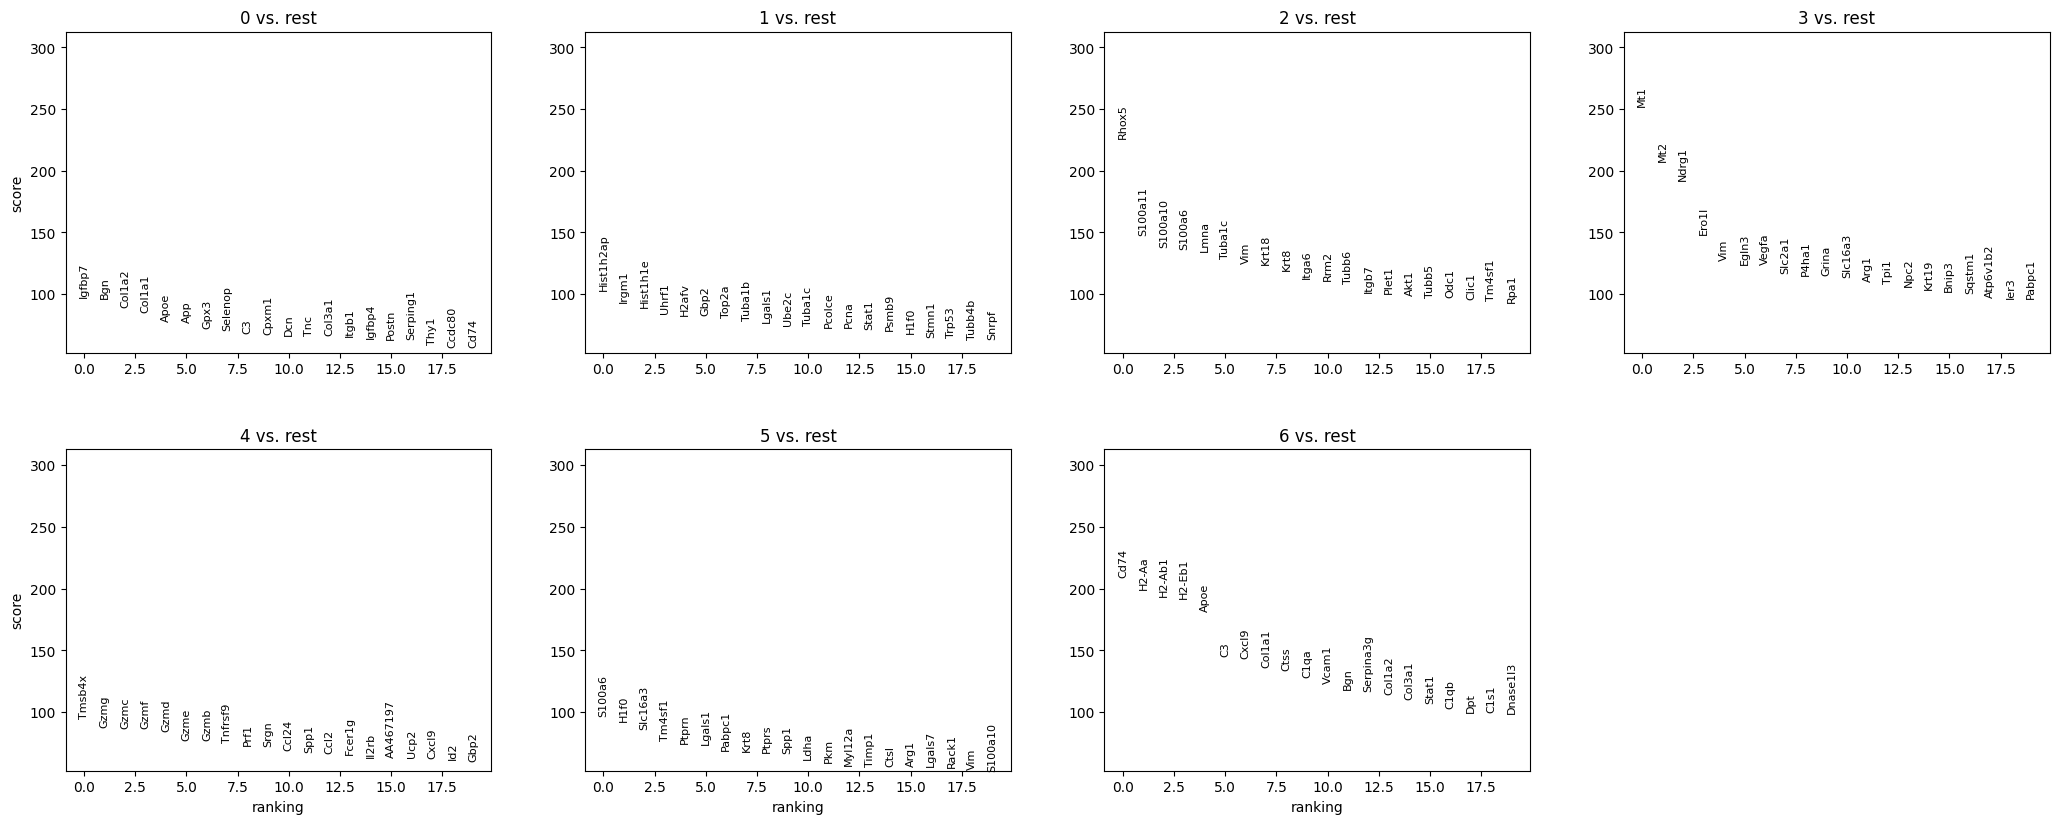

In [2]:
sc.tl.rank_genes_groups(fdata, groupby='cluster', method='t-test')
sc.pl.rank_genes_groups(fdata, groupby='cluster', n_genes=20)

In [3]:
deg_data = pd.read_csv('./Graph-Based Features.csv')

In [4]:
deg_data.set_index('FeatureName', inplace=True)

In [5]:
deg_data

,FeatureID,Cluster 1 Average,Cluster 1 Log2 Fold Change,Cluster 1 P-Value,Cluster 2 Average,Cluster 2 Log2 Fold Change,Cluster 2 P-Value,Cluster 3 Average,Cluster 3 Log2 Fold Change,Cluster 3 P-Value,...,Cluster 8 P-Value,Cluster 9 Average,Cluster 9 Log2 Fold Change,Cluster 9 P-Value,Cluster 10 Average,Cluster 10 Log2 Fold Change,Cluster 10 P-Value,Cluster 11 Average,Cluster 11 Log2 Fold Change,Cluster 11 P-Value
FeatureName,,,,,,,,,,,,,,,,,,,,,
Dsc2,ENSMUSG00000024331,0.000990,-3.095793,3.026855e-31,0.001425,-2.453827,4.983092e-18,0.001931,-2.023802,8.139780e-14,...,2.251388e-124,0.007284,0.410777,0.566674,0.110544,4.213541,7.856613e-08,0.051517,3.055025,0.488598
Ctsg,ENSMUSG00000040314,0.001201,-3.160312,5.227639e-33,0.003076,-1.639099,9.098303e-10,0.002304,-2.113248,3.651102e-15,...,5.735695e-121,0.005828,-0.191003,0.566674,0.118479,3.952132,8.707555e-07,0.009091,0.541968,0.488598
Fcrl6,ENSMUSG00000070504,0.001579,-2.717206,1.313266e-26,0.002087,-2.201661,9.029070e-16,0.002713,-1.828788,4.206557e-12,...,2.111464e-115,0.008741,0.325350,0.566674,0.130792,4.141150,9.369852e-08,0.003030,-0.428217,0.557659
Gzmf,ENSMUSG00000015441,0.059032,-2.701710,2.902722e-29,0.074393,-2.258885,4.053188e-18,0.122891,-1.509658,1.440059e-09,...,5.559259e-115,0.190851,-0.643163,0.566674,4.735892,4.108974,9.369852e-08,0.187886,-0.655624,0.488598
Tmsb15a,ENSMUSG00000060726,0.001939,-3.054225,1.482110e-32,0.003224,-2.192903,5.570248e-16,0.004722,-1.632845,3.549695e-10,...,5.559259e-115,0.005828,-0.778311,0.604436,0.198104,4.119976,9.369852e-08,0.012122,0.276860,0.488598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sgnon-targeting_46,sgnon-targeting_46,0.000006,2.513942,5.678917e-01,0.000000,1.000964,1.000000e+00,0.000000,0.818354,1.000000e+00,...,1.000000e+00,0.000000,8.866447,1.000000,0.000000,6.448852,1.000000e+00,0.000000,9.921617,1.000000
sgnon-targeting_47,sgnon-targeting_47,0.000102,0.069157,9.901155e-01,0.000148,0.768303,2.764090e-01,0.000148,0.785932,3.590169e-01,...,1.000000e+00,0.000000,3.822053,1.000000,0.000000,1.404458,1.000000e+00,0.000000,4.877223,1.000000
sgnon-targeting_48,sgnon-targeting_48,0.000006,-0.486058,9.080345e-01,0.000000,-1.168961,5.875263e-01,0.000021,1.233391,7.439605e-01,...,1.000000e+00,0.000000,6.696522,1.000000,0.000274,5.448852,9.491148e-01,0.000000,7.751692,1.000000


In [20]:
bulk_data = pd.read_csv('../20240502-SPACseq/bulkdata/Group_sgCd44_vs_sginter_DESeq2.txt', sep='\t')
gene_list_bulk = bulk_data[(bulk_data['padj'] < 0.01) & (bulk_data['log2FoldChange'] < -0.5)].Gene_name.tolist()
len(gene_list_bulk)

89

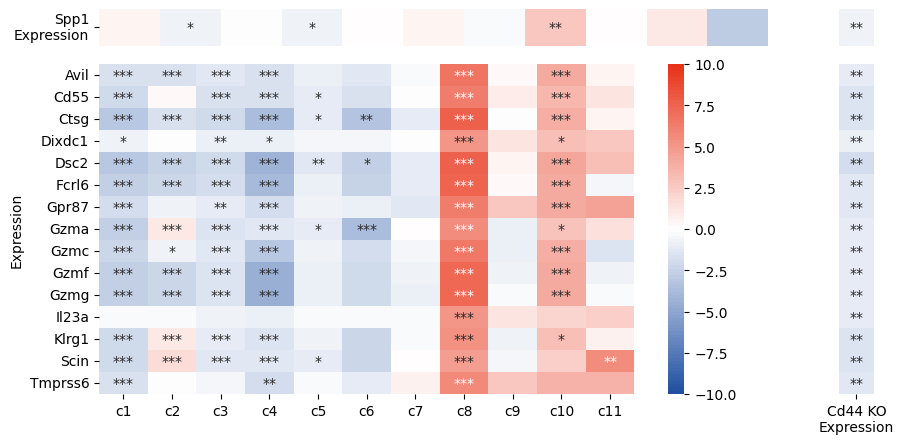

In [48]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(10, 5), height_ratios=[0.1, 0.9], width_ratios=[0.95, 0.05])
plt.subplots_adjust(hspace=0.1)

sns.heatmap(deg_data.loc['Spp1', deg_data.columns.str.contains('Log2 Fold Change')].values.astype(float).reshape(1, -1),
            cmap=custom_cmap,
            annot=deg_data.loc['Spp1', deg_data.columns.str.contains('P-Value')].map(lambda x: '**' if x < 0.01 else ('*' if x < 0.05 else '')).values.astype(str).reshape(1, -1), fmt='s',
            vmax=10, vmin=-10, cbar=False, ax=ax1)
ax1.set_yticks([0.5])
ax1.set_yticklabels(['Spp1\nExpression'], rotation=0)
ax1.set_xticks([])

gene_list = np.intersect1d(deg_data.head(50).index, gene_list_bulk)

sns.heatmap(deg_data.loc[gene_list, deg_data.columns.str.contains('Log2 Fold Change')].values.astype(float),
            cmap=custom_cmap,
            annot=deg_data.loc[gene_list, deg_data.columns.str.contains('P-Value')].map(lambda x: '***' if x < 0.001 else ('**' if x < 0.01 else ('*' if x < 0.05 else ''))).values.astype(str), fmt='s',
            vmax=10, vmin=-10, ax=ax3)
ax3.set_yticks(np.arange(0, len(gene_list)) + 0.5)
ax3.set_yticklabels(gene_list, rotation=0)
ax3.set_xticks(np.arange(0, 11) + 0.5)
ax3.set_xticklabels([f'c{x+1}' for x in range(0, 11)])
ax3.set_ylabel('Expression')

sns.heatmap(bulk_data.loc[gene_list, 'log2FoldChange'].values.astype(float).reshape(-1, 1),
            cmap=custom_cmap,
            annot=bulk_data.loc[gene_list, 'padj'].map(lambda x: '**' if x < 0.01 else ('*' if x < 0.05 else '')).values.astype(str).reshape(-1, 1), fmt='s',
            vmax=7, vmin=-7, cbar=False, ax=ax4)
ax4.set_yticks([])
ax4.set_xticks([0.5])
ax4.set_xticklabels(['Cd44 KO\nExpression'])

sns.heatmap(bulk_data.loc[['Spp1'], 'log2FoldChange'].values.astype(float).reshape(-1, 1),
            cmap=custom_cmap,
            annot=bulk_data.loc[['Spp1'], 'padj'].map(lambda x: '**' if x < 0.01 else ('*' if x < 0.05 else '')).values.astype(str).reshape(-1, 1), fmt='s',
            vmax=7, vmin=-7, cbar=False, ax=ax2)

sns.despine(ax=ax2, left=True, bottom=True)
ax2.set_xticks([])
ax2.set_yticks([])


plt.rcParams['pdf.fonttype'] = 42
plt.savefig('./plots/spp1_deg.pdf', bbox_inches='tight', format='pdf')
plt.show()

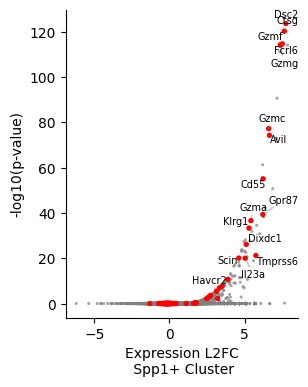

In [22]:
plot_data = deg_data.loc[:, ['Cluster 8 Log2 Fold Change', 'Cluster 8 P-Value']]
plot_data['-log10(p-value)'] = -np.log10(plot_data['Cluster 8 P-Value'])
plot_data['sig'] = plot_data.index.isin(gene_list_bulk)

plt.figure(figsize=(3, 4))
sns.scatterplot(x='Cluster 8 Log2 Fold Change',
                y='-log10(p-value)',
                data=plot_data[~plot_data['sig']],
                s=5, edgecolor='none', linewidth=0.5, color='gray', alpha=0.7)
sns.scatterplot(x='Cluster 8 Log2 Fold Change',
                y='-log10(p-value)',
                data=plot_data[plot_data['sig']],
                s=15, edgecolor='none', linewidth=0.5, color='red')
text = []
for i in plot_data[plot_data['sig']].index:
    if plot_data.loc[i, 'Cluster 8 Log2 Fold Change'] > 4:
        text.append(plt.text(plot_data.loc[i, 'Cluster 8 Log2 Fold Change'], plot_data.loc[i, '-log10(p-value)'], i, fontsize=7, ha='center', va='center'))
text.append(plt.text(plot_data.loc['Havcr2', 'Cluster 8 Log2 Fold Change'], plot_data.loc['Havcr2', '-log10(p-value)'], 'Havcr2', fontsize=7, ha='center', va='center'))
import adjustText
adjustText.adjust_text(text, plot_data.loc[plot_data[plot_data['sig']].index, 'Cluster 8 Log2 Fold Change'],
                       plot_data.loc[plot_data[plot_data['sig']].index, '-log10(p-value)'],
                       arrowprops=dict(arrowstyle='-', color='gray', alpha=0.5))
plt.xlabel('Expression L2FC\n Spp1+ Cluster')
plt.ylabel('-log10(p-value)')
sns.despine()
# plt.gca().invert_xaxis()

plt.savefig('./plots/spp1_deg.pdf', bbox_inches='tight', format='pdf')
plt.show()

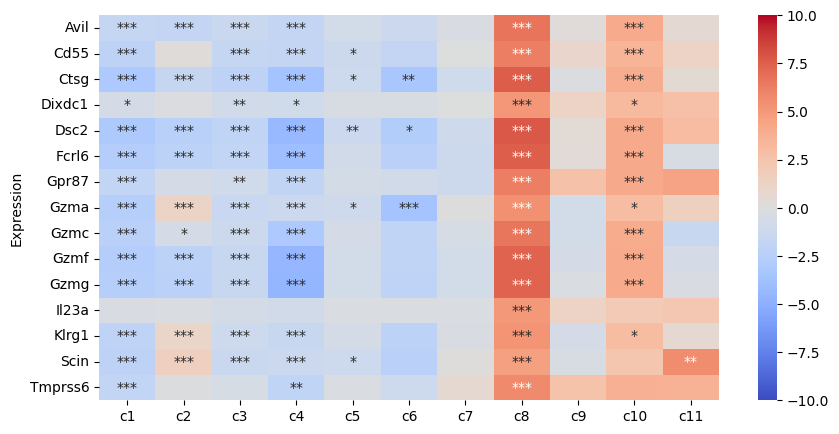

In [14]:
gene_list = np.intersect1d(deg_data.head(50).index, gene_list_bulk)
plt.figure(figsize=(10, 5))
sns.heatmap(deg_data.loc[gene_list, deg_data.columns.str.contains('Log2 Fold Change')].values.astype(float),
            cmap='coolwarm',
            annot=deg_data.loc[gene_list, deg_data.columns.str.contains('P-Value')].map(lambda x: '***' if x < 0.001 else ('**' if x < 0.01 else ('*' if x < 0.05 else ''))).values.astype(str), fmt='s',
            vmax=10, vmin=-10)
plt.yticks(np.arange(0, len(gene_list)) + 0.5, gene_list, rotation=0)
plt.xticks(np.arange(0, 11) + 0.5, [f'c{x+1}' for x in range(0, 11)])
plt.ylabel('Expression')

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('./plots/spp1_deg_expression.pdf', bbox_inches='tight', format='pdf')
plt.show()


# Spatial analysis

In [12]:
cluster_df = pd.read_csv('/data200T/SPACseq/HD/output/subq/outs/binned_outputs/square_008um/analysis/clustering/gene_expression_graphclust/clusters.csv', sep=',')
fdata.obs['loupe_cluster'] = fdata.obs.index.map(cluster_df.set_index('Barcode')['Cluster'].to_dict()).tolist()
fdata.obs['loupe_cluster'] = fdata.obs['loupe_cluster'].astype('category')

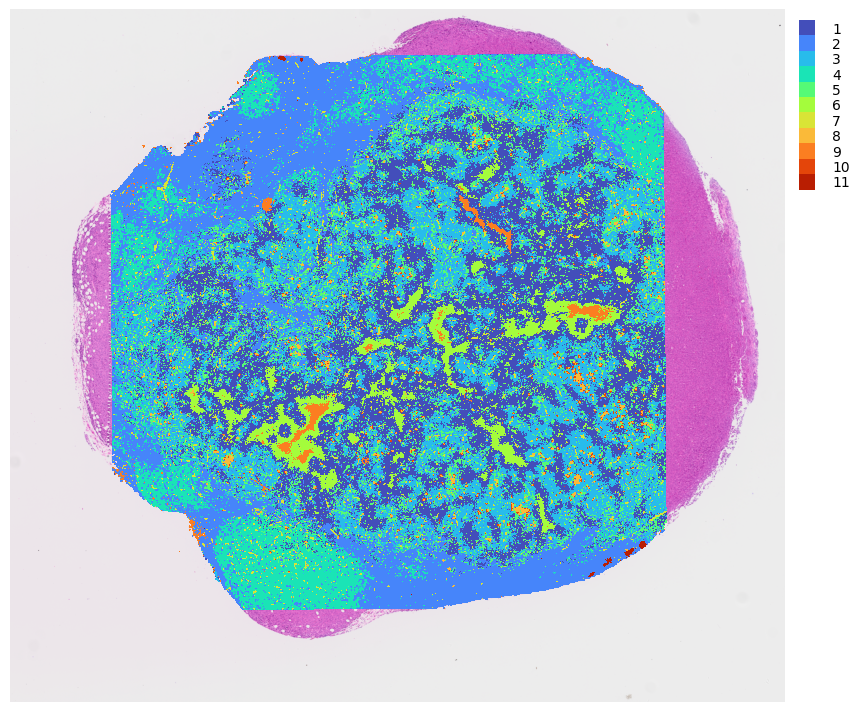

In [19]:
img_path = '/data200T/SPACseq/HD/output/subq/outs/binned_outputs/square_008um/spatial/tissue_hires_image.png'
img = plt.imread(img_path)
img = img[:, :, :]
plt.figure(figsize=(10, 10))
plt.imshow(img)

sns.scatterplot(x=(fdata.obsm['spatial'][:, 0]) * 0.08734006,
                y=fdata.obsm['spatial'][:, 1] * 0.08734006,
                hue=fdata.obs['loupe_cluster'], palette='turbo', s=0.3, edgecolor='none', marker='s')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1), fontsize=10, frameon=False, labelspacing=0.1, markerscale=20)
plt.xlim([3000, 6000])
sns.despine(left=True, bottom=True)
plt.xticks([])
plt.yticks([])

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('/home/wpy/stereoseq/20231128-HD/plots/spp1_cluster.pdf', bbox_inches='tight', format='pdf')
plt.show()

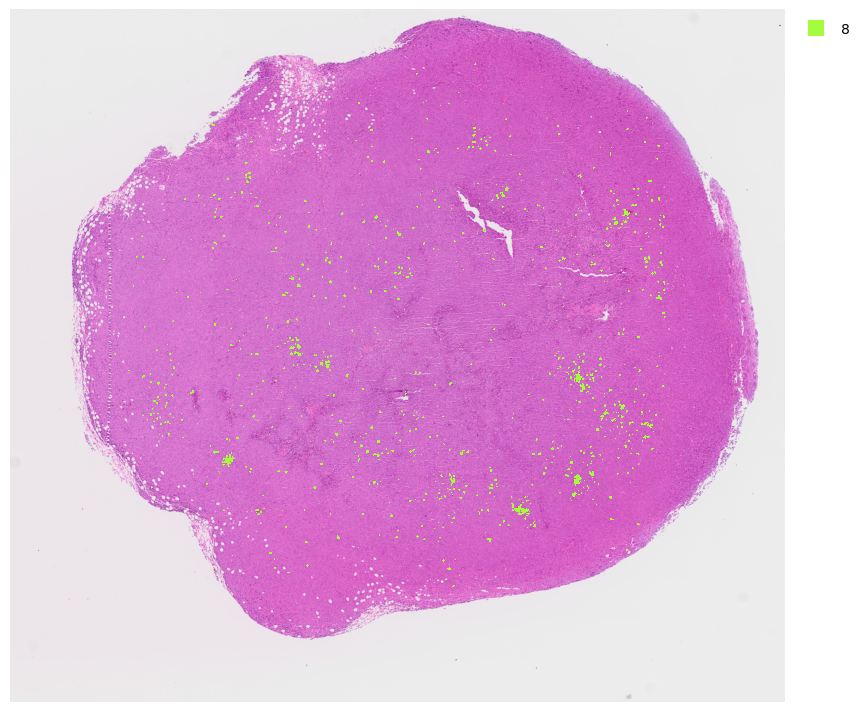

In [27]:
img_path = '/data200T/SPACseq/HD/output/subq/outs/binned_outputs/square_008um/spatial/tissue_hires_image.png'
img = plt.imread(img_path)
img = img[:, :, :]
plt.figure(figsize=(10, 10))
plt.imshow(img)

plot_data = fdata[fdata.obs.loupe_cluster == 8]

sns.scatterplot(x=(plot_data.obsm['spatial'][:, 0]) * 0.08734006,
                y=plot_data.obsm['spatial'][:, 1] * 0.08734006,
                hue=plot_data.obs['loupe_cluster'], palette='turbo', s=0.3, edgecolor='none', marker='s')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1), fontsize=10, frameon=False, labelspacing=0.1, markerscale=20)
plt.xlim([3000, 6000])
sns.despine(left=True, bottom=True)
plt.xticks([])
plt.yticks([])

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('/home/wpy/stereoseq/20231128-HD/plots/spp1_cluster_8.pdf', bbox_inches='tight', format='pdf')
plt.show()

/tmp/ipykernel_201743/2644795727.py:8: RuntimeWarning: divide by zero encountered in log2
  spp1_expr = np.log2(fdata[:, 'Spp1'].X.toarray().flatten())


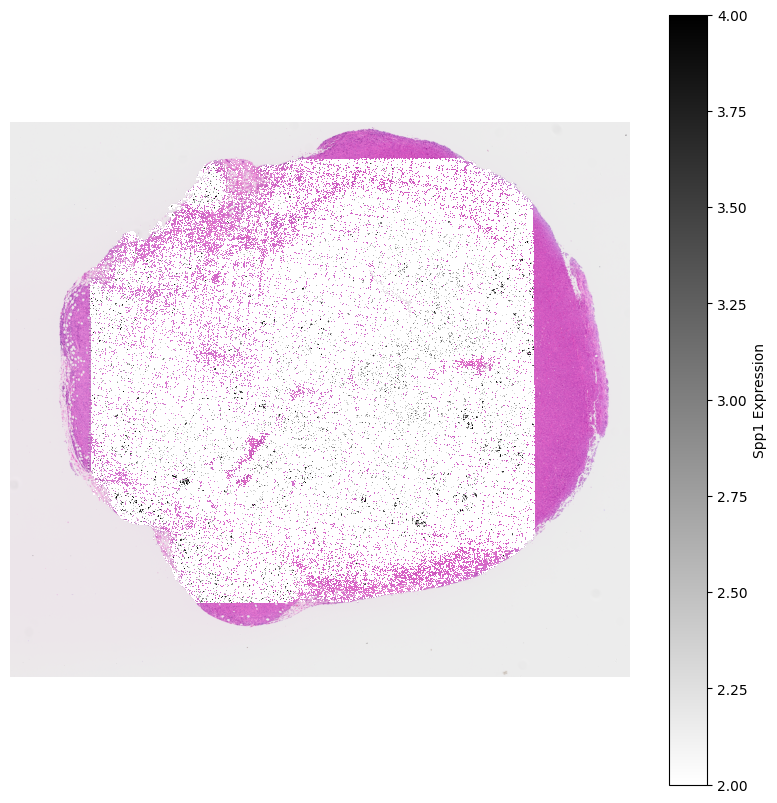

In [51]:
img_path = '/data200T/SPACseq/HD/output/subq/outs/binned_outputs/square_008um/spatial/tissue_hires_image.png'
img = plt.imread(img_path)
img = img[:, :, :]
plt.figure(figsize=(10, 10))
plt.imshow(img)

# 获取Spp1表达值
spp1_expr = np.log2(fdata[:, 'Spp1'].X.toarray().flatten())

# 只保留2-4范围内的数据点
mask = (spp1_expr >= 0) & (spp1_expr <= 4)
plot_data = fdata[mask]
spp1_expr = spp1_expr[mask]

scatter = sns.scatterplot(x=(plot_data.obsm['spatial'][:, 0]) * 0.08734006,
                y=plot_data.obsm['spatial'][:, 1] * 0.08734006,
                c=spp1_expr, cmap='binary', s=0.5, edgecolor='none', marker='s',
                vmin=2, vmax=4)
plt.colorbar(scatter.collections[0], label='Spp1 Expression')
plt.xlim([3000, 6000])
sns.despine(left=True, bottom=True)
plt.xticks([])
plt.yticks([])

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('/home/wpy/stereoseq/20231128-HD/plots/spp1_expression.pdf', bbox_inches='tight', format='pdf')
plt.show()

/tmp/ipykernel_201743/2268656179.py:5: RuntimeWarning: divide by zero encountered in log2
  'Spp1': np.log2(fdata[:, 'Spp1'].X.toarray().flatten()),


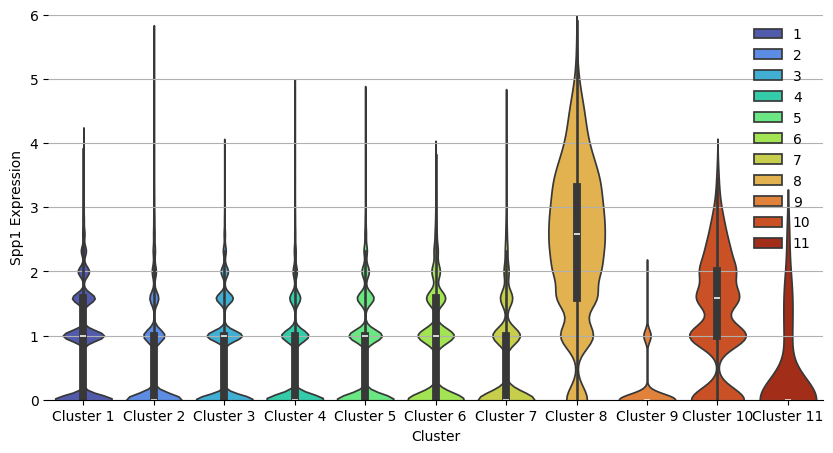

In [45]:
plt.figure(figsize=(10, 5))

# 准备数据
plot_data = pd.DataFrame({
    'Spp1': np.log2(fdata[:, 'Spp1'].X.toarray().flatten()),
    'Cluster': fdata.obs['loupe_cluster']
})

# 绘制小提琴图
sns.violinplot(data=plot_data, x='Cluster', y='Spp1', hue='Cluster', palette='turbo')
plt.gca().set_ylim([0, 6])
plt.grid(axis='y')

plt.xticks(np.arange(0, 11), [f'Cluster {x+1}' for x in range(0, 11)])

plt.legend(frameon=False)

# 美化图形
# plt.xlabel('Cluster')
plt.ylabel('Spp1 Expression')
sns.despine(left=True)

# 保存图形
plt.rcParams['pdf.fonttype'] = 42
plt.savefig('/home/wpy/stereoseq/20231128-HD/plots/spp1_violin.pdf', bbox_inches='tight', format='pdf')
plt.show()